In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_Training.xlsx to Dataset_Training (13).xlsx


In [ ]:
data = pd.read_excel("Dataset_Training.xlsx")

In [ ]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,0
515,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
516,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
517,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Text(0.5, 0, 'Target Variable')

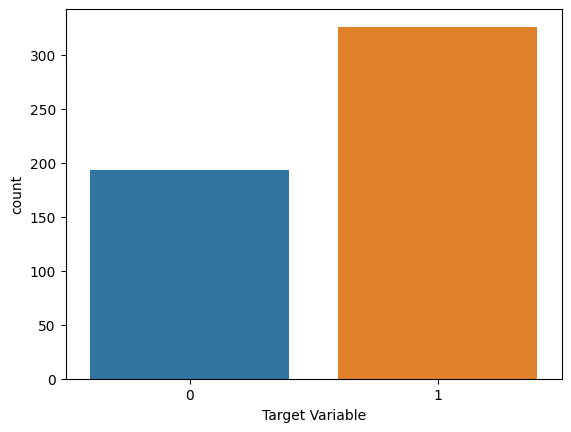

In [ ]:
sns.countplot(data=data, x="y")
plt.xlabel('Target Variable')

<Axes: >

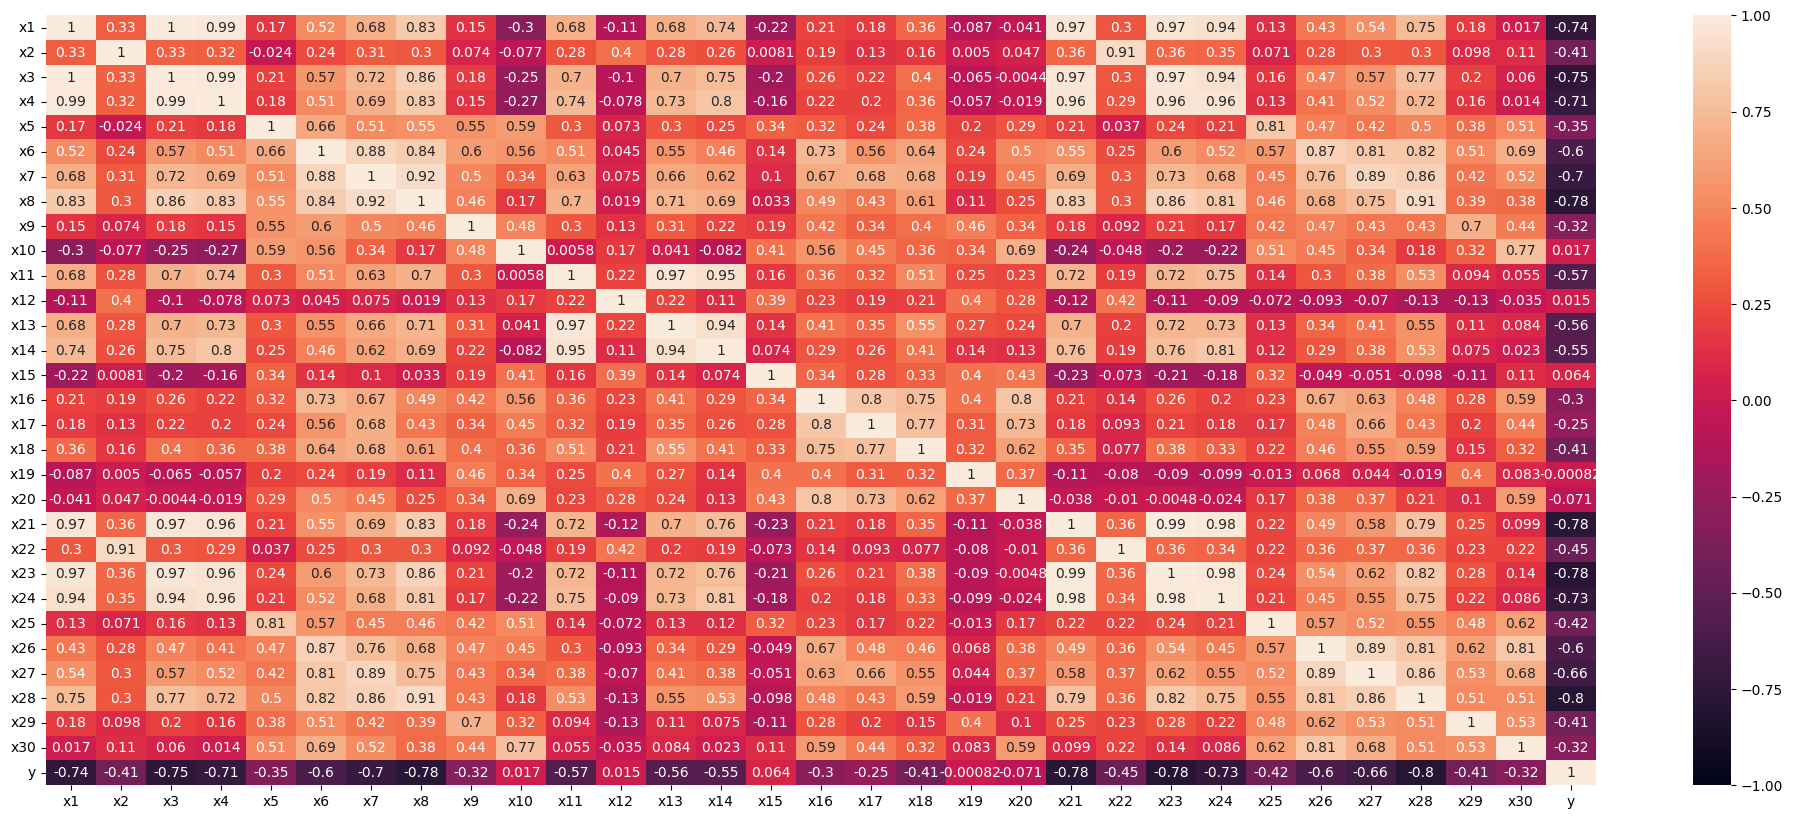

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']

x = data.loc[:,features].values
# Normalizing x1,...x30 Features

x = StandardScaler().fit_transform(x)
y = data.loc[:,['y']].values

feature_columns = ['x' + str(i) for i in range(x.shape[1])]
normal_data = pd.DataFrame(x, columns=feature_columns)
normal_data.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,1.091989,-2.078255,1.261183,0.975081,1.539776,3.246122,2.624292,2.504174,2.202266,2.260448,...,1.865421,-1.356942,2.273822,1.967371,1.280270,2.618891,2.107097,2.275326,2.716134,1.960049
1,1.573704,0.457230,1.556547,1.545643,0.916993,1.031334,1.345408,2.012375,0.928317,-0.401919,...,1.493953,-0.024444,1.328298,1.430266,0.505524,1.080521,0.852349,1.935719,1.132670,0.211022
2,-0.769698,0.254298,-0.593871,-0.761742,3.245353,3.364671,1.893323,1.430925,2.850160,4.924237,...,-0.283347,0.133181,-0.251406,-0.547144,3.352062,3.899483,1.987140,2.155554,5.980825,4.981198
3,1.743721,-1.154564,1.765764,1.811152,0.258825,0.521386,1.352880,1.407872,-0.018045,-0.566895,...,1.282566,-1.464192,1.319461,1.198098,0.200849,-0.320026,0.610516,0.715258,-0.869096,-0.392091
4,-0.477835,-0.837337,-0.389167,-0.504707,2.205022,1.221388,0.852285,0.808235,0.993834,1.893519,...,-0.168418,-0.313693,-0.117972,-0.245846,2.015843,1.721136,1.260682,0.891126,1.728873,2.267190


In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1','PC2'])

In [ ]:
principalDf

,PC1,PC2
0,9.087144,1.925230
1,5.656260,-1.070436
2,7.087033,10.145270
3,3.856290,-1.907819
4,2.349846,3.894682
...,...,...
514,8.626132,-0.551346
515,3.713001,-3.543314
516,1.206568,-1.897033
517,10.279486,1.632656


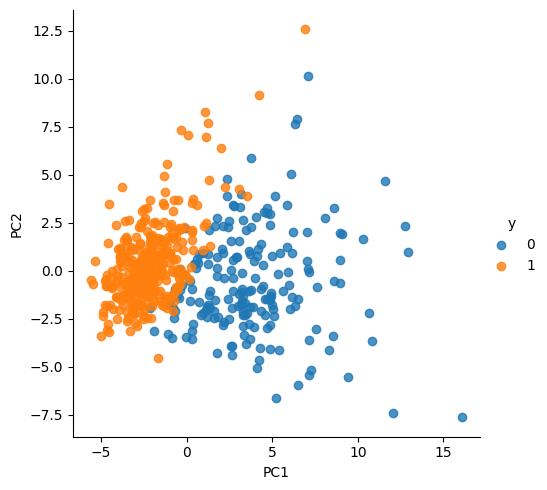

In [ ]:
data['PC1'] = principalComponents[:,0]
data['PC2'] = principalComponents[:,1]
sns.lmplot(x="PC1", y="PC2", hue='y', data=data, fit_reg=False)

In [ ]:
print("The Explained Variance of PCA:", pca.explained_variance_ratio_)

The Explained Variance of PCA: [0.44363705 0.18898985]


# 1. Random Forest and Classification tree




## a. Data preprocessing for Random Forest and Classification tree

In [ ]:
import pandas as pd
import numpy as np # linear algebra

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_excel("Dataset_Training.xlsx")
test = pd.read_excel("Dataset_Test.xlsx")

X = train.iloc[:,:-1]
y = train.iloc[:,-1:]
test_X = test.iloc[:,:-1]

pca = PCA(n_components=30)
train_features = StandardScaler().fit_transform(X)
train_features = pca.fit_transform(train_features)

test_features = StandardScaler().fit_transform(test_X)
test_features = pca.fit_transform(test_features)

## b. Random forest with PCA

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs = 1,
                                         random_state = 2023,
                                         oob_score=True)

Text(0.5, 1.0, 'Random forest')

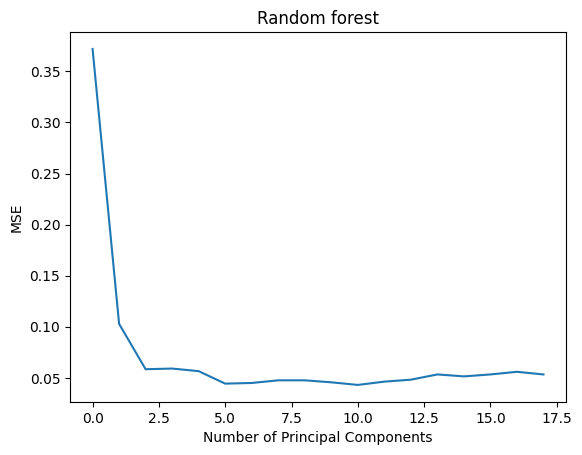

In [ ]:


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
score = -1*model_selection.cross_val_score(rf,
           np.ones((len(X),1)), y.values.ravel(), cv=cv,
           scoring='neg_mean_squared_error').mean()
mse.append(score)
lowest_PC = 17
lowest_mse = 1
for i in np.arange(1, 18):
    score = -1*model_selection.cross_val_score(rf,
               train_features[:,:i], y.values.ravel(), cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if score < lowest_mse:
      lowest_mse = score
      lowest_PC = i
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Random forest')

In [ ]:
print("PC = ", lowest_PC, ", MSE = ", lowest_mse)

PC =  10 , MSE =  0.04303670186023128


When PC= 5, The MSE became stable, so we use PC=5 for Random Forest

In [ ]:
RF_scores = cross_val_score(rf, train_features[:,:5], y.values.ravel(), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (RF_scores.mean(), RF_scores.std()))

0.96 accuracy with a standard deviation of 0.02


Random Forest prediction for testing dataset

In [ ]:
rf.fit(train_features[:,:5],y.values.ravel())

test_pred = rf.predict(test_features[:,:5])
test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0])

## c. Classification Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=2023)

Text(0.5, 1.0, 'Classification Tree')

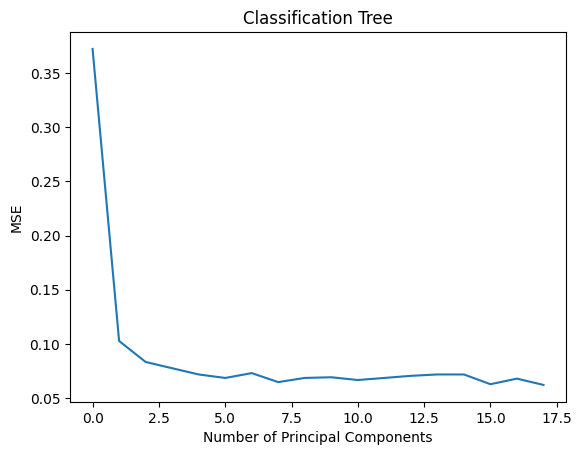

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
score = -1*model_selection.cross_val_score(clf,
           np.ones((len(X),1)), y.values.ravel(), cv=cv,
           scoring='neg_mean_squared_error').mean()
mse.append(score)
lowest_PC = 17
lowest_mse = 1
for i in np.arange(1, 18):
    score = -1*model_selection.cross_val_score(clf,
               train_features[:,:i], y.values.ravel(), cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if score < lowest_mse:
      lowest_mse = score
      lowest_PC = i
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Classification Tree')

In [ ]:
lowest_PC, lowest_mse

(17, 0.06230517848164907)

When PC= 5, The MSE became stable, so we use PC=5 for Decision Tree

In [ ]:
scores = cross_val_score(clf, train_features[:,:5], y.values.ravel(), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.03


In [ ]:
clf.fit(train_features[:,:5],y.values.ravel())

DecisionTreeClassifier(random_state=2023)

[Text(0.6088709677419355, 0.9375, 'x[0] <= 0.375\ngini = 0.467\nsamples = 519\nvalue = [193, 326]'), Text(0.3467741935483871, 0.8125, 'x[0] <= -1.086\ngini = 0.133\nsamples = 335\nvalue = [24, 311]'), Text(0.14516129032258066, 0.6875, 'x[1] <= -3.096\ngini = 0.03\nsamples = 266\nvalue = [4, 262]'), Text(0.06451612903225806, 0.5625, 'x[1] <= -3.129\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'), Text(0.03225806451612903, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'), Text(0.0967741935483871, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.22580645161290322, 0.5625, 'x[3] <= 1.097\ngini = 0.023\nsamples = 261\nvalue = [3, 258]'), Text(0.16129032258064516, 0.4375, 'x[2] <= 1.973\ngini = 0.009\nsamples = 215\nvalue = [1, 214]'), Text(0.12903225806451613, 0.3125, 'gini = 0.0\nsamples = 203\nvalue = [0, 203]'), Text(0.1935483870967742, 0.3125, 'x[2] <= 2.045\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'), Text(0.16129032258064516, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]

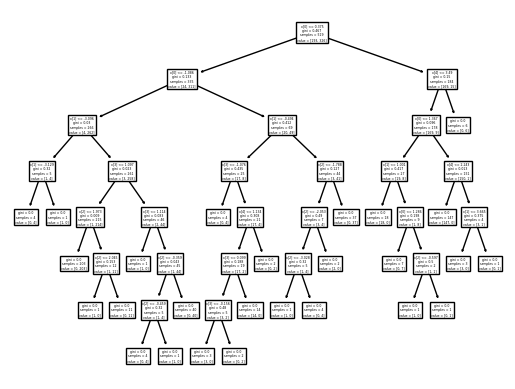

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import mean_squared_error
clf = clf.fit(train_features[:,:5], y)
print(tree.plot_tree(clf))

## Tree pruning

In [ ]:
path = clf.cost_complexity_pruning_path(train_features[:,:5], y)
alphas, impurities = path.ccp_alphas, path.impurities

MSE=[]
mean, std = [], []
for i in alphas:
  pruned_tree = DecisionTreeClassifier(ccp_alpha=i, random_state=2023)
  pruned_tree=pruned_tree.fit(train_features[:,:5], y)
  scores = cross_val_score(pruned_tree, train_features[:,:5], y, cv=5).mean()
  MSE.append(scores)
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies
eva_df = pd.DataFrame({'alpha': alphas, 'MSE': MSE})
eva_df = eva_df.sort_values(['MSE'], ascending = True)
eva_df.head(10)

,alpha,MSE
14,0.328214,0.737752
12,0.019471,0.905527
13,0.020163,0.905527
11,0.012838,0.921004
0,0.000000,0.924776
1,0.001713,0.924776
2,0.001884,0.924776
3,0.001902,0.924776
4,0.001914,0.924776
8,0.004166,0.926699


[Text(0.5357142857142857, 0.9166666666666666, 'x[0] <= 0.375\ngini = 0.467\nsamples = 519\nvalue = [193, 326]'), Text(0.21428571428571427, 0.75, 'x[0] <= -1.086\ngini = 0.133\nsamples = 335\nvalue = [24, 311]'), Text(0.14285714285714285, 0.5833333333333334, 'gini = 0.03\nsamples = 266\nvalue = [4, 262]'), Text(0.2857142857142857, 0.5833333333333334, 'x[1] <= -0.494\ngini = 0.412\nsamples = 69\nvalue = [20, 49]'), Text(0.14285714285714285, 0.4166666666666667, 'x[3] <= -1.076\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'), Text(0.07142857142857142, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'), Text(0.21428571428571427, 0.25, 'x[4] <= 1.134\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'), Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'), Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.42857142857142855, 0.4166666666666667, 'x[2] <= -1.788\ngini = 0.127\nsamples = 44\nvalue = [3, 41]'), Text(0.

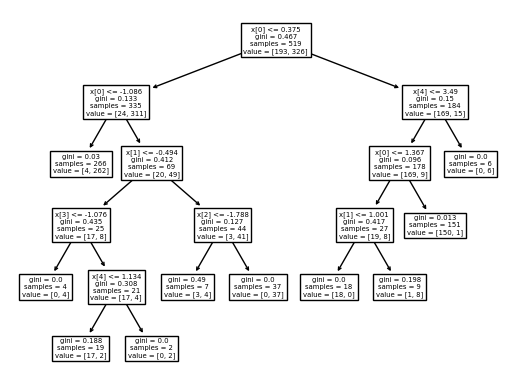

In [ ]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.004166, random_state=2023)
clf = pruned_tree.fit(train_features[:,:5], y)
print(tree.plot_tree(clf))

In [ ]:
CT_scores = cross_val_score(pruned_tree, train_features[:,:5], y.values.ravel(), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (CT_scores.mean(), CT_scores.std()))

0.93 accuracy with a standard deviation of 0.03


Classification Tree prediction for testing dataset

In [ ]:
test_pred = pruned_tree.predict(test_features[:,:5])
test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0])

# Deep Learning Model

# Normalization

In [ ]:
#features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']

#x = data.loc[:,features].values
#x = StandardScaler().fit_transform(x)
#y = data.loc[:,['y']].values

#feat_cols = ['x'+str(i) for i in range(x.shape[1])]
#normalised_data = pd.DataFrame(x,columns=feat_cols)
#normalised_data.head(5)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [ ]:
#model = Sequential()
#model.add(Dense(30, input_shape=(30,), activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model.fit(x_train, y_train, epochs=10, batch_size=16)

In [ ]:
#kf = KFold(n_splits=5, shuffle=True, random_state=1)

#scores = []
#for train_index, test_index in kf.split(x):
    #X_train, X_test = x[train_index], x[test_index]
    #y_train, y_test = y[train_index], y[test_index]

    #model.fit(X_train, y_train, epochs=10, batch_size=16)
    #_, accuracy = model.evaluate(X_test, y_test)
    #scores.append(accuracy)

#print("Cross-validation scores:", scores)
#print("Mean accuracy:", sum(scores) / len(scores))
#print("Standard deviation:", np.std(scores))


In [ ]:
#plt.plot(history.history['loss'])
#plt.title('Training Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.show()

# Plot training accuracy (if applicable)
#if 'accuracy' in history.history:
    #plt.plot(history.history['accuracy'])
    #plt.title('Training Accuracy')
    #plt.xlabel('Epoch')
    #plt.ylabel('Accuracy')
    #plt.show()
!pip install ISLP==0.3.19

### Logistic Regression

Import dataset again + Standardize Predictors

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
df_train = pd.read_excel("Dataset_Training.xlsx", index_col=0, skiprows=0)
df_train=df_train.reset_index()
features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']

x = df_train.loc[:,features].values
# Normalizing x1,...x30 Features

x = StandardScaler().fit_transform(x)
y = df_train.loc[:,['y']].values

#feature_columns = ['x' + str(i) for i in range(x.shape[1])]
normal_data_train = pd.DataFrame(x, columns=features)
normal_data_train['y'] = y

In [ ]:
df_test = pd.read_excel("Dataset_Test.xlsx", index_col=0, skiprows=0)
df_test=df_test.reset_index()
features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']

x = df_test.loc[:,features].values
# Normalizing x1,...x30 Features

x = StandardScaler().fit_transform(x)
y = df_test.loc[:,['y']].values

#feature_columns = ['x' + str(i) for i in range(x.shape[1])]
normal_data_test = pd.DataFrame(x, columns=features)
normal_data_test['y'] = y
#df_test

In [ ]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl
from ISLP import load_data
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import ModelSpec as MS
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA, FastICA, NMF, FactorAnalysis
roc_curve = RocCurveDisplay.from_estimator # shorthand notation

ModuleNotFoundError: ignored

Split data into training and test set

In [ ]:
x_train=normal_data_train.drop(['y'], axis=1)

In [ ]:
x_test=normal_data_test.drop(['y'], axis=1)
#x_test

In [ ]:
y_train = normal_data_train.loc[:, ["y"]]
#y_train

Dimension reduction to 5 Principal Components

In [ ]:
#Logistic regression
#Dimension reduction to 5 predictors
pca_pl = make_pipeline(StandardScaler(),PCA(n_components = 5, random_state = 0))
pcs_x_train = pca_pl.fit_transform(x_train)
pcs_df_x_train = pd.DataFrame(pcs_x_train , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
#pcs_df_x_train['y'] = df_train.y.values
#pcs_df_x_train

In [ ]:
pcs_x_test = pca_pl.fit_transform(x_test)
pcs_df_x_test = pd.DataFrame(pcs_x_test , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
#pcs_df_x_test['y'] = df_test.y.values
#pcs_df_x_test

Fit into Logistic Regression Model

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#Fit logistic regression model
glm_train = sm.GLM(y_train, pcs_df_x_train, family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict()

In [ ]:
#Training data (prediction)
labels= np.array([0]*519)
labels[probs>0.5] = 1
#labels

Compare estimated data with actual data

In [ ]:
confusion_table(labels, y_train.y)

In [ ]:
#Training MSE
np.mean(labels != y_train.y)

Predict data in test set

In [ ]:
#Test data (prediction)
probs = results.predict(exog=pcs_df_x_test)
#probs

In [ ]:
#Prediction class with logistic regression
labels= np.array([0]*50)
labels[probs>0.5] = 1
labels

Accuracy of Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(pcs_df_x_train, y_train)
LR_scores=clf.score(pcs_df_x_train, y_train)
LR_scores

### Support Vector Machine

Dimension Reduction to 2 Principal Components

In [ ]:
#SVM
#PCA=2
pca_pl = make_pipeline(StandardScaler(),PCA(n_components = 2, random_state = 0))
pcs_x_train = pca_pl.fit_transform(x_train)
pcs_df_x_train = pd.DataFrame(pcs_x_train , columns = ['PC1', 'PC2'])
#pcs_df_x_train['y'] = df_train.y.values
#pcs_df_x_train

In [ ]:
pcs_x_test = pca_pl.fit_transform(x_test)
pcs_df_x_test = pd.DataFrame(pcs_x_test , columns = ['PC1', 'PC2'])
#pcs_df_x_test['y'] = df_test.y.values
#pcs_df_x_test

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

Convert Datafrme to Numpy Array

In [ ]:
pcs_df_x_train_array = np.array(pcs_df_x_train)
y_train_array = np.array(y_train)
pcs_df_x_test_array = np.asarray(pcs_df_x_test)

Fit into SVM (try C=0.01)

In [ ]:
svm_linear = SVC(C=0.01, kernel='linear').fit(pcs_df_x_train_array, y_train_array)
y_train_hat = svm_linear.predict(pcs_df_x_train_array)
y_train_hat=pd.DataFrame(y_train_hat, columns = ['y_train_hat'])
y_train_hat=np.asarray(y_train_hat)
confusion_table(y_train_hat , y_train_array)

In [ ]:
#Training MSE
np.mean(y_train_hat != y_train_array)

Predict data in test set

In [ ]:
#Prediction class for SVM, C=0.01
probs = svm_linear.predict(pcs_df_x_test_array)
probs

Accuracy of SVM (C=0.01)

In [ ]:
clf = svm.SVC(kernel='linear', C=0.01, random_state=42)
scores = cross_val_score(clf, pcs_df_x_train_array, y_train_array, cv=5)
np.mean(scores)

Choose the Best Parameter C by 5-fold Cross-validation

In [ ]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
#kfold
grid = skm.GridSearchCV(svm_linear, {'C':[0.01,0.1,1,5,10]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(pcs_df_x_train_array, y_train_array)
grid.best_params_

Fit the Model Again with the Best Parameter + Compare estimated data with actual data

In [ ]:
#Training MSE
best_ = grid.best_estimator_
y_train_hat = best_.predict(pcs_df_x_train_array)
y_train_hat=pd.DataFrame(y_train_hat, columns = ['y_train_hat'])
y_train_hat=np.asarray(y_train_hat)
confusion_table(y_train_hat , y_train_array)

In [ ]:
#Training MSE
np.mean(y_train_hat != y_train_array)

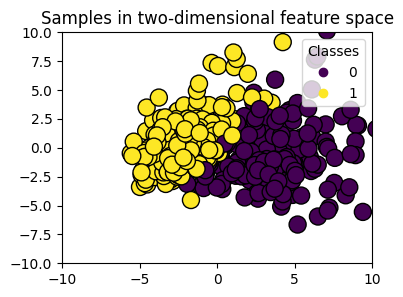

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


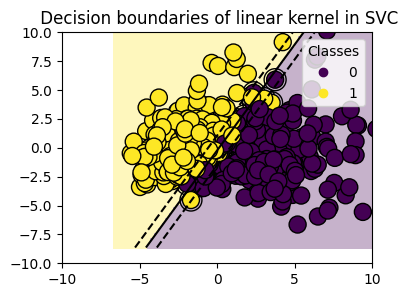

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

X = pcs_df_x_train_array

y = y_train_array

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max =  -10, 10, -10, 10
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

def plot_training_data_with_decision_boundary(kernel):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -10, 10, -10, 10
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

plot_training_data_with_decision_boundary("linear")

Predict data in test set

In [ ]:
#Prediction class for SVM, best C, C=1
probs = best_.predict(pcs_df_x_test_array)
probs

Accuracy of SVM (Best Parameter)

In [ ]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, pcs_df_x_train_array, y_train_array, cv=5)
SVM_scores=np.mean(scores)

In [ ]:
#Methods=["Random Forest", "Classification Tree", "Logistic Regression", "Support Vector Machine"]
#Scores=[RF_scores.mean(), CT_scores.mean(), LR_scores, SVM_scores]
Table=[['Random Forest', RF_scores.mean()], ['Classification Tree', CT_scores.mean()],
    ['Logistic Regression', LR_scores], ['Support Vector Machine', SVM_scores]]
Comparison = pd.DataFrame(Table, columns=['Methods', 'Accuracy Scores'])
Comparison

In [ ]:
#PCA graph for LR
train = pd.read_excel("Dataset_Training.xlsx")
test = pd.read_excel("Dataset_Test.xlsx")
X = train.iloc[:,:-1]
y = train.iloc[:,-1:]
test_X = test.iloc[:,:-1]
x_train=normal_data_train.drop(['y'], axis=1)
pca_pl = make_pipeline(StandardScaler(),PCA(n_components = 5, random_state = 0))
pcs_x_train = pca_pl.fit_transform(x_train)
pcs_df_x_train = pd.DataFrame(pcs_x_train , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
clf=LogisticRegressionCV(cv=5, random_state=0).fit(pcs_df_x_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
score = -1*model_selection.cross_val_score(clf,
           np.ones((len(X),1)), y.values.ravel(), cv=cv,
           scoring='neg_mean_squared_error').mean()
mse.append(score)
lowest_PC = 17
lowest_mse = 1
for i in np.arange(1, 18):
    score = -1*model_selection.cross_val_score(clf,
               train_features[:,:i], y.values.ravel(), cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    if score < lowest_mse:
      lowest_mse = score
      lowest_PC = i
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Logistic Regression')

# Export Result in Testing Dataset